In [7]:
import geopandas as gpd
import fiona
from shapely.geometry import Point

fiona.drvsupport.supported_drivers['LIBKML'] = 'rw'

with fiona.open("PlanningBoundaryArea.kml") as collection:
    gdf = gpd.GeoDataFrame.from_features(collection)

transformer = pyproj.Transformer.from_crs(
    "EPSG:3414",  # SVY21 (Singapore)
    "EPSG:4326"   # WGS84
)

In [26]:
lon = 103.851959  # Your longitude
lat = 1.290270    # Your latitude
point = Point(lon, lat)
gdf["slots"] =0
for index, row in gdf.iterrows():
    if(row['geometry'].contains(point)):
        gdf.loc[index, 'slots']= 10
        print(row['REGION_N'])

CENTRAL REGION


<Axes: >

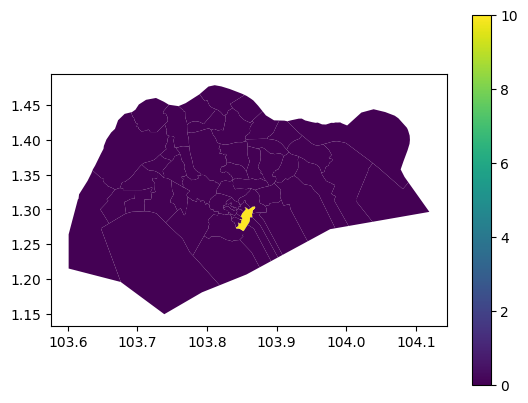

In [27]:
gdf.plot("slots", legend=True)